<a href="https://colab.research.google.com/github/SerhiiKutkovskyiDA/SerhiiKutkovskyiDA/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <u>**Executive Summary**</u>

This report provides a comprehensive analysis of sales data to uncover key performance indicators, identify significant trends, and understand the factors influencing sales and profit. The analysis covers data cleaning, exploration of key metrics, and detailed visualizations across various dimensions including item types, countries, sales channels, and time. Key findings and recommendations are provided to guide business decisions.



## Basic Settings

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Mate Academy/Mate Homework/Final project

events = pd.read_csv("events.csv")
countries = pd.read_csv("countries.csv")
products = pd.read_csv("products.csv")
events.head()
#countries.head()
#products.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate Academy/Mate Homework/Final project


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


## <u>**1. Data overview &  Data cleaning**</u>
The analysis utilized data from three sources: `events.csv`, `countries.csv`, and `products.csv`. These datasets were loaded into pandas DataFrames for manipulation.
*   **Data Merging:** A left merge was performed to combine the datasets. `events.csv` was merged with `countries.csv` on `Country Code` and `alpha-3`, and the result was then merged with `products.csv` on `Product ID` and `id`. This resulted in a consolidated DataFrame `df_total`.
*   **Date Conversion:** The 'Order Date' and 'Ship Date' columns were converted to datetime objects using the specified format '%m/%d/%Y'.
*   **Column Management:** Redundant columns introduced during the merge (`alpha-2`, `alpha-3`, `Country Code`) were removed.
*   **Column Naming Consistency:** All column names were converted to lowercase. The 'name' column, which represented the country name, was explicitly renamed to 'country' for clarity.
*   **Handling Missing Values:** A strategy was implemented to address missing data. For columns with 'object' dtype, missing values were imputed with the string 'Unknown'. For numerical columns ('int64', 'float64'), missing values were filled with the mean of the respective column. The analysis showed that after this process, there are no remaining missing values.
*   **Data Normalization:** Text-based columns were further processed by stripping leading/trailing whitespace and converting all entries to lowercase to ensure consistency and facilitate accurate grouping and analysis.
*   **Duplicate Identification:** A check for completely duplicate rows was performed. The output of this check indicated the presence of duplicate entries in the dataset, which could potentially skew aggregated results if not handled. (Note: The current code identifies duplicates but does not explicitly remove them. For future analysis, consider dropping duplicates if appropriate).

In [ ]:
countr_join  = pd.merge(events, countries, left_on = "Country Code", right_on = "alpha-3", how="left")
df_total  = pd.merge(countr_join, products, left_on = "Product ID", right_on = "id", how="left")
df_total["Order Date"] = pd.to_datetime(df_total["Order Date"], format="%m/%d/%Y")
df_total["Ship Date"] = pd.to_datetime(df_total["Ship Date"], format="%m/%d/%Y")
df_total.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe,2103,Cereal
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,NaN,7940,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe,2455,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe,1270,Beverages


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
 10  name            1248 non-null   object        
 11  alpha-2         1248 non-null   object        
 12  alpha-3         1248 non-null   object        
 13  region          1248 non-null   object        
 14  sub-region      1248 non-null   object        
 15  id  

### **Primary Data Processing**
- Removing unnecessary columns  
- Handling missing values  
- Working with column names  
- Converting all data to the same case (for duplicate detection)  
- Finding duplicates  


##### *Checking for Missing Data*  ↓

In [ ]:
df_total = df_total.drop("alpha-2", axis=1)
df_total = df_total.drop("alpha-3", axis=1)
df_total = df_total.drop("Country Code", axis=1)
df_total.columns = df_total.columns.str.lower()
df_total.rename(columns={'name': 'country'}, inplace=True)

print(df_total.isna().sum() / df_total.index.size * 100)



order id          0.000000
order date        0.000000
ship date         0.000000
order priority    0.000000
product id        0.000000
sales channel     0.000000
units sold        0.150376
unit price        0.000000
unit cost         0.000000
country           6.165414
region            6.165414
sub-region        6.165414
id                0.000000
item_type         0.000000
dtype: float64


In [ ]:
for column in df_total.columns:
    if df_total[column].dtype == 'object':

        df_total[column] = df_total[column].fillna('Unknown')
    elif df_total[column].dtype in ['int64', 'float64']:

        mean_value = df_total[column].mean()
        df_total[column] = df_total[column].fillna(mean_value)



print(df_total.isna().sum() / len(df_total) * 100)
df_total.head()
df_total.info()

order id          0.0
order date        0.0
ship date         0.0
order priority    0.0
product id        0.0
sales channel     0.0
units sold        0.0
unit price        0.0
unit cost         0.0
country           0.0
region            0.0
sub-region        0.0
id                0.0
item_type         0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order id        1330 non-null   int64         
 1   order date      1330 non-null   datetime64[ns]
 2   ship date       1330 non-null   datetime64[ns]
 3   order priority  1330 non-null   object        
 4   product id      1330 non-null   int64         
 5   sales channel   1330 non-null   object        
 6   units sold      1330 non-null   float64       
 7   unit price      1330 non-null   float64       
 8   unit cost       1330 non-null   float64      

##### *Data normalization ↓*

In [ ]:
for column in df_total.columns:
    if df_total[column].dtype == 'object':

        df_total[column] = df_total[column].str.strip().str.lower()


print(df_total.head())

    order id order date  ship date order priority  product id sales channel  \
0  100640618 2014-10-08 2014-10-18              m        2103        online   
1  100983083 2016-08-11 2016-08-11              c        2103       offline   
2  101025998 2014-07-18 2014-08-11              m        7940        online   
3  102230632 2017-05-13 2017-06-13              l        2455        online   
4  103435266 2012-08-11 2012-09-18              h        1270       offline   

   units sold  unit price  unit cost     country   region       sub-region  \
0       650.0      205.70     117.11      norway   europe  northern europe   
1      1993.0      205.70     117.11      serbia   europe  southern europe   
2      4693.0      668.27     502.54     unknown  unknown          unknown   
3      1171.0      109.28      35.84  montenegro   europe  southern europe   
4      7648.0       47.45      31.79      serbia   europe  southern europe   

     id  item_type  
0  2103     cereal  
1  2103     ce

##### *Duplicate check ↓*

In [ ]:
duplicate_rows = df_total[df_total.duplicated(keep=False)]

print(duplicate_rows)

Empty DataFrame
Columns: [order id, order date, ship date, order priority, product id, sales channel, units sold, unit price, unit cost, country, region, sub-region, id, item_type]
Index: []


## <u>**2. Data analysis and visualization**</u>
Initial calculations provided a high-level overview of the sales performance:

*   **Total Orders:** 1330 unique orders were recorded.
*   **Total Countries:** Sales were conducted in 46 different countries.
*   **Total Item Types:** The product catalog consists of 12 distinct item types.
*   **Total Spend:** The cumulative cost of goods sold across all transactions amounts to 249038.26 $.
* **Total profit:** The total profit generated from all sales is 501,841,827.00. This was calculated as the sum of the product of the profit per item (`unit price` - `unit cost`) and the `units sold` for each transaction.
*   **Total Units Sold:** A total of 6,586,428.40 units were sold.

These metrics provide a baseline for evaluating performance and understanding the scale of operations.

# Visualization

## <u>**3. Analysis and Visualization by Item Type**</u>
Analysis of sales data by item type revealed significant variations in performance:

*   **Average Unit Price:** Item types exhibit a wide range in average unit prices. Identifying high-value items is crucial for pricing strategies and understanding market positioning.
*   **Average profit:** The average profit generated per transaction varies considerably by item type. Some items contribute significantly more profit per sale than others.
*   **Average Unit Cost:** The cost associated with different item types impacts profitability. Understanding average unit cost is essential for margin analysis.
*   **Average Units Sold:** The average number of units sold per transaction differs across item types. This indicates varying popularity or purchasing patterns.
*   **Popularity (Total Units Sold):** The aggregated total units sold per item type (though not directly visualized in the provided code as 'item\_popular', the average units sold plot gives an indication) highlights the most popular items in terms of volume.

The visualizations clearly demonstrate which item types are leading in terms of price, profit potential, cost, and sales volume. Further investigation into the most profit-generating and highest-volume items is recommended.


In [ ]:
#by_item_type
df_total["profit by item"] = df_total["unit price"] - df_total["unit cost"]
df_total["profit"] = df_total["profit by item"] * df_total["units sold"]
price_by_item = df_total.groupby("item_type")["unit price"].mean().sort_values(ascending=False)
profit_by_item = df_total.groupby("item_type")["profit"].mean().sort_values(ascending=False)
cost_by_item = df_total.groupby("item_type")["unit cost"].mean().sort_values(ascending=False)
sold_by_item = df_total.groupby("item_type")["units sold"].mean().sort_values(ascending=False)
item_popular = df_total.groupby("item_type")["units sold"].sum().sort_values(ascending=False)

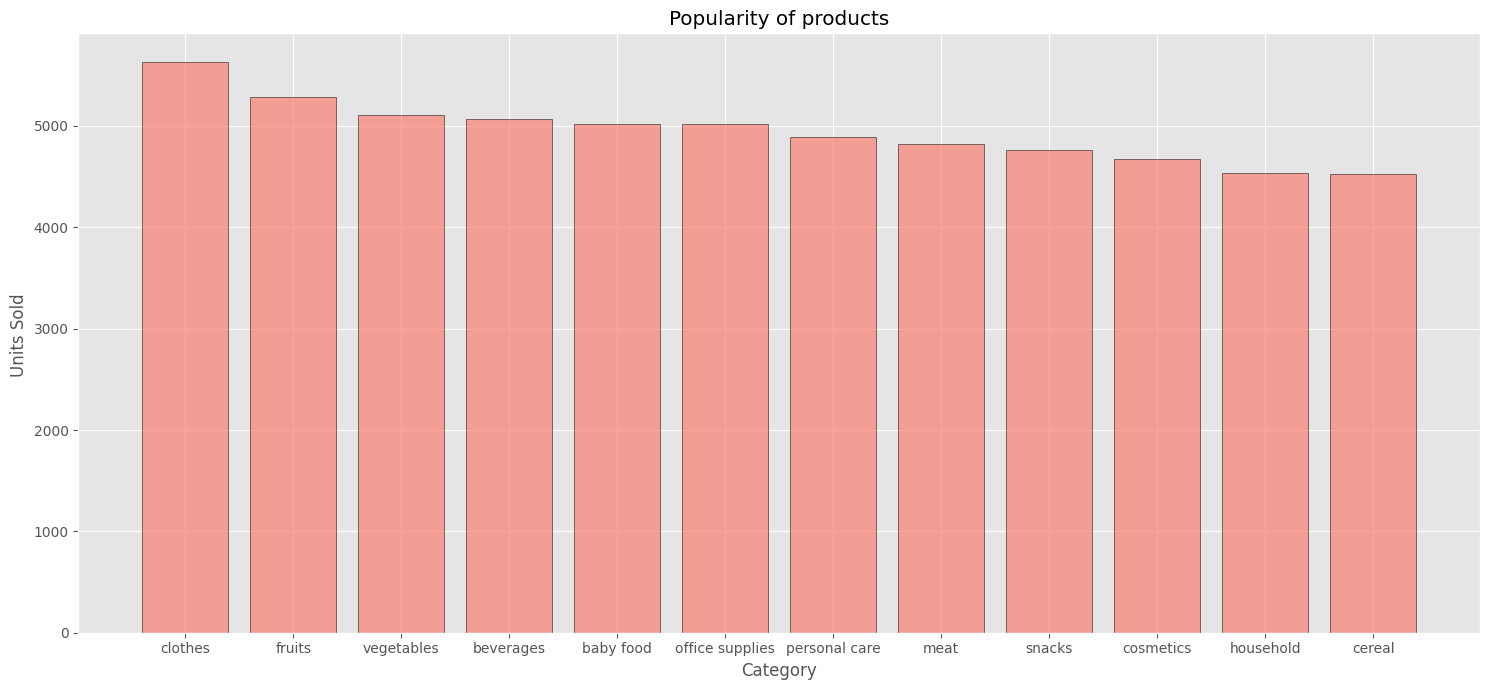

In [ ]:
#title
plt.figure(figsize=(15, 7))
plt.style.use("ggplot")
plt.bar(sold_by_item.index, sold_by_item.values, color="salmon",  alpha = 0.7, edgecolor = "black")
plt.title("Popularity of products")
plt.xlabel("Category")
plt.ylabel("Units Sold ")
plt.tight_layout()
plt.show()

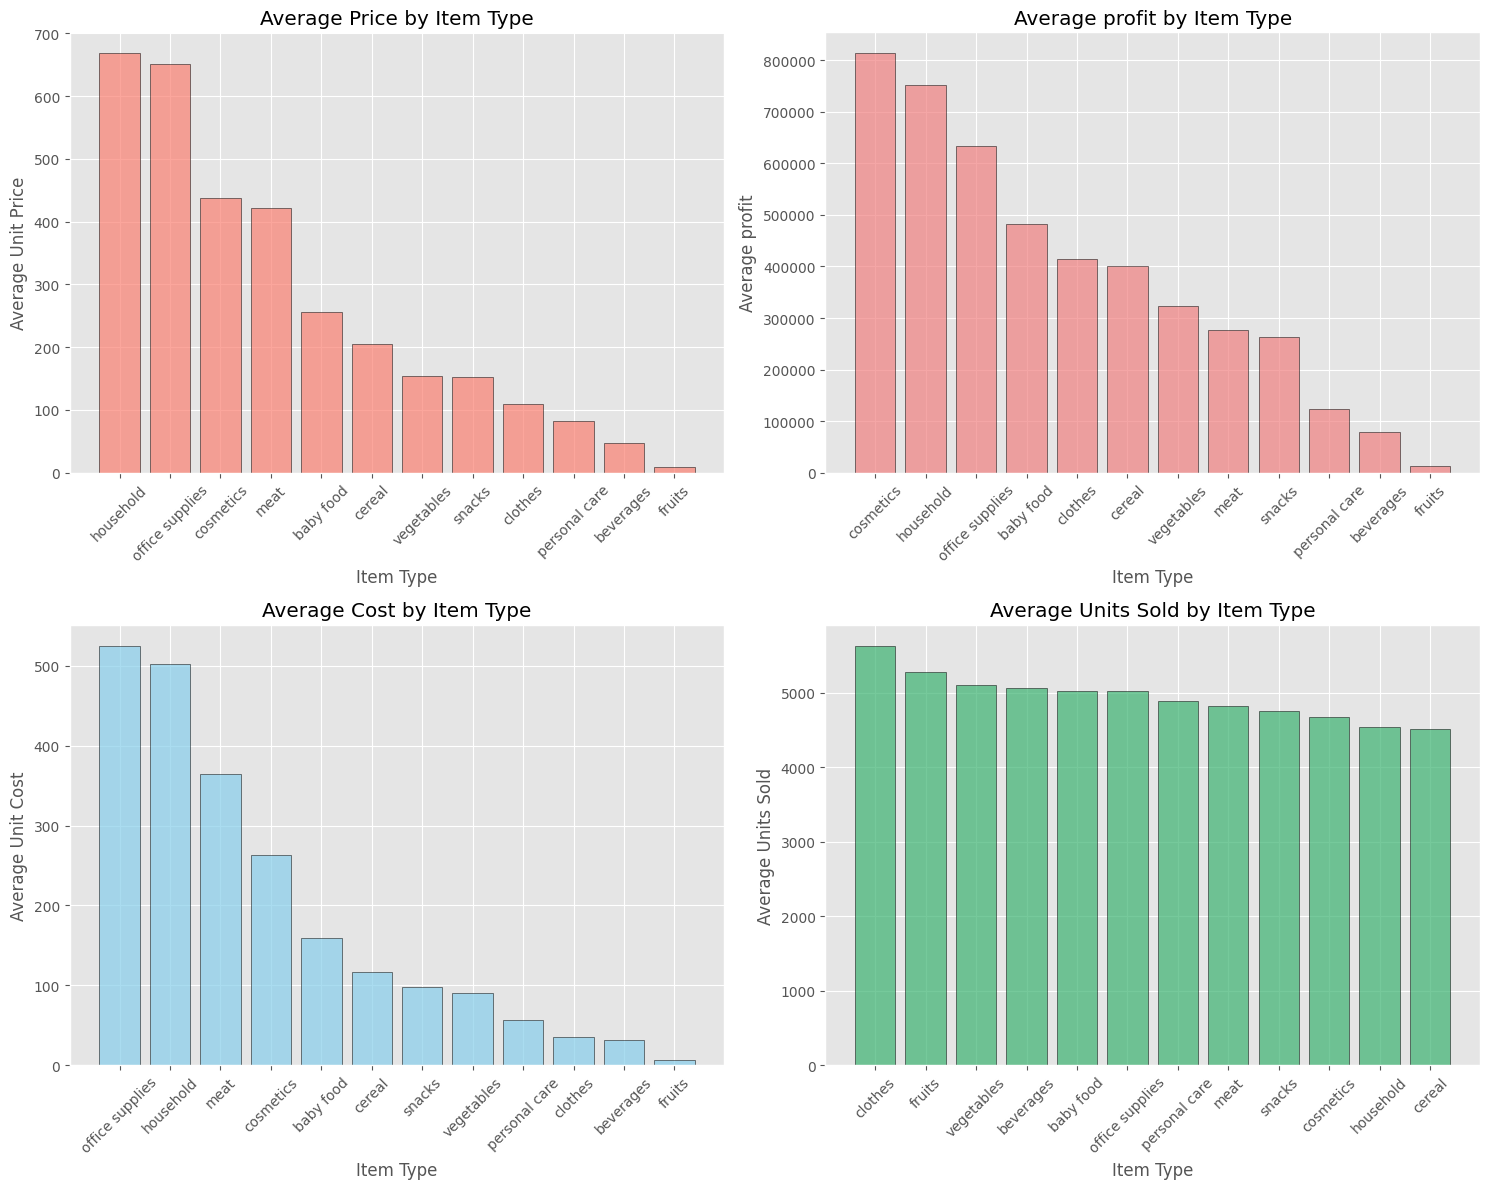

In [ ]:
plt.style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].bar(price_by_item.index, price_by_item.values, color="salmon", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Average Price by Item Type")
axes[0, 0].set_xlabel("Item Type")
axes[0, 0].set_ylabel("Average Unit Price")
axes[0, 0].tick_params(axis='x', rotation=45)


axes[0, 1].bar(profit_by_item.index, profit_by_item.values, color="lightcoral", alpha=0.7, edgecolor="black")
axes[0, 1].set_title("Average profit by Item Type")
axes[0, 1].set_xlabel("Item Type")
axes[0, 1].set_ylabel("Average profit")
axes[0, 1].tick_params(axis='x', rotation=45)


axes[1, 0].bar(cost_by_item.index, cost_by_item.values, color="skyblue", alpha=0.7, edgecolor="black")
axes[1, 0].set_title("Average Cost by Item Type")
axes[1, 0].set_xlabel("Item Type")
axes[1, 0].set_ylabel("Average Unit Cost")
axes[1, 0].tick_params(axis='x', rotation=45)


axes[1, 1].bar(sold_by_item.index, sold_by_item.values, color="mediumseagreen", alpha=0.7, edgecolor="black")
axes[1, 1].set_title("Average Units Sold by Item Type")
axes[1, 1].set_xlabel("Item Type")
axes[1, 1].set_ylabel("Average Units Sold")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## <u>**4. Visualization by Country**</u>
The analysis by country provides insights into geographical performance:

- Bar charts show the top 10 countries by average unit price, average profit, average unit cost, and average units sold.  
  Insight: These visualizations identify countries with higher average prices, profits, costs, and sales volumes, indicating potential markets for growth or areas needing strategic adjustments.
- A choropleth map visualizes the total units sold by country.  
  Insight: The choropleth map provides a geographical representation of sales volume, highlighting regions with the highest sales activity. This can be useful for understanding market penetration and identifying key markets.


In [ ]:
#by_country
country_price = df_total.groupby('country')['unit price'].mean().reset_index()
country_profit = df_total.groupby('country')['profit'].mean().reset_index()
country_cost = df_total.groupby('country')['unit cost'].mean().reset_index()
country_sold = df_total.groupby('country')['units sold'].mean().reset_index()
#country_sales = df_total.groupby('country')['units sold'].sum().reset_index()

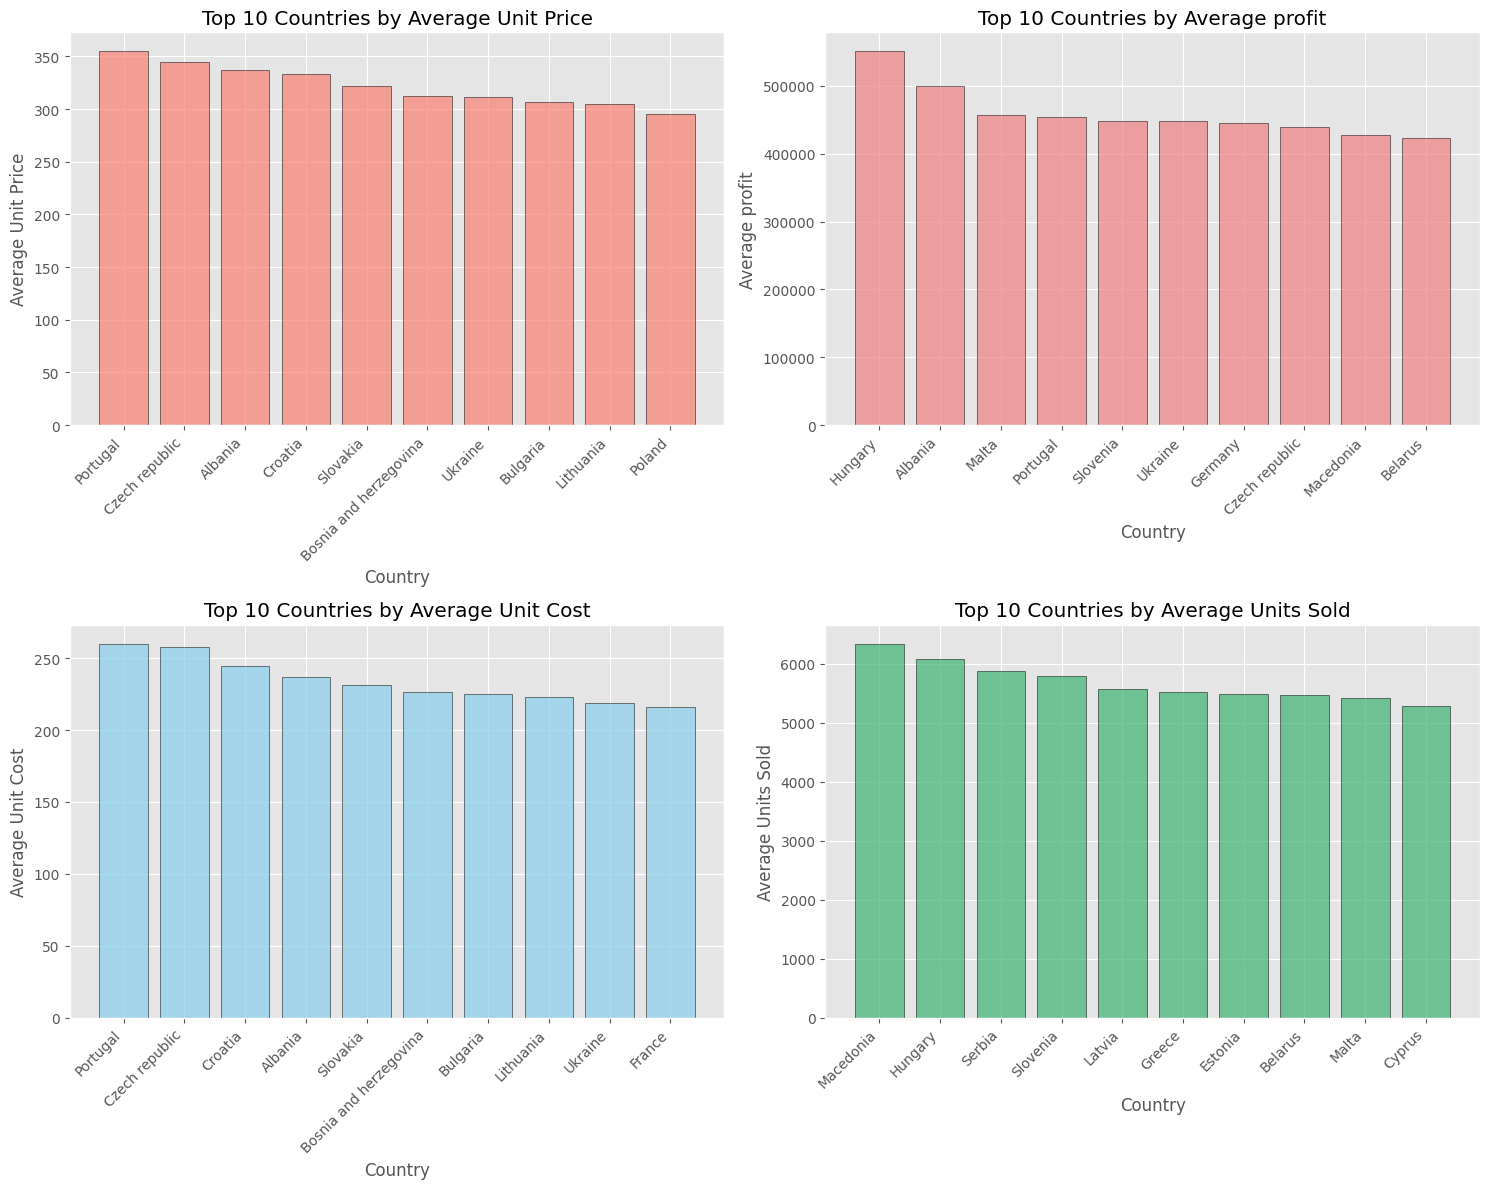

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plot_data_price = country_price.sort_values(by='unit price', ascending=False).head(10)
axes[0, 0].bar(plot_data_price['country'], plot_data_price['unit price'], color="salmon", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Top 10 Countries by Average Unit Price")
axes[0, 0].set_xlabel("Country")
axes[0, 0].set_ylabel("Average Unit Price")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticks(axes[0, 0].get_xticks())
axes[0, 0].set_xticklabels(plot_data_price['country'].str.capitalize(), ha='right')


plot_data_profit = country_profit.sort_values(by='profit', ascending=False).head(10)
axes[0, 1].bar(plot_data_profit['country'], plot_data_profit['profit'], color="lightcoral", alpha=0.7, edgecolor="black")
axes[0, 1].set_title("Top 10 Countries by Average profit")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Average profit")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticks(axes[0, 1].get_xticks())
axes[0, 1].set_xticklabels(plot_data_profit['country'].str.capitalize(), ha='right')

plot_data_cost = country_cost.sort_values(by='unit cost', ascending=False).head(10)
axes[1, 0].bar(plot_data_cost['country'], plot_data_cost['unit cost'], color="skyblue", alpha=0.7, edgecolor="black")
axes[1, 0].set_title("Top 10 Countries by Average Unit Cost")
axes[1, 0].set_xlabel("Country")
axes[1, 0].set_ylabel("Average Unit Cost")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticks(axes[1, 0].get_xticks())
axes[1, 0].set_xticklabels(plot_data_cost['country'].str.capitalize(), ha='right')

plot_data_sold = country_sold.sort_values(by='units sold', ascending=False).head(10)
axes[1, 1].bar(plot_data_sold['country'], plot_data_sold['units sold'], color="mediumseagreen", alpha=0.7, edgecolor="black")
axes[1, 1].set_title("Top 10 Countries by Average Units Sold")
axes[1, 1].set_xlabel("Country")
axes[1, 1].set_ylabel("Average Units Sold")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticks(axes[1, 1].get_xticks())
axes[1, 1].set_xticklabels(plot_data_sold['country'].str.capitalize(), ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

country_sales = df_total.groupby('country')['units sold'].sum().reset_index()


fig = px.choropleth(
    country_sales,
    locations="country",
    locationmode="country names",
    color="units sold",
    color_continuous_scale="teal",
    title="Total Units Sold by Country"
)


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        #projection_type='orthographic'
    ),
    width=1000,
    height=500,
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

## <u>**5.Visualization by channel**</u>
Analysis by sales channel provides insights into the performance of different sales methods:
- Bar charts show the average unit price, average profit, average unit cost, and average units sold by sales channel.  

  Insight: These visualizations reveal which sales channels are more effective in terms of price, profit, cost, and sales volume. This information can inform strategies for channel optimization and resource allocation.


In [ ]:
#by_sales_channel
channel_price = df_total.groupby('sales channel')['unit price'].mean().reset_index()
channel_profit = df_total.groupby('sales channel')['profit'].mean().reset_index()
channel_cost = df_total.groupby('sales channel')['unit cost'].mean().reset_index()
channel_sold = df_total.groupby('sales channel')['units sold'].mean().reset_index()

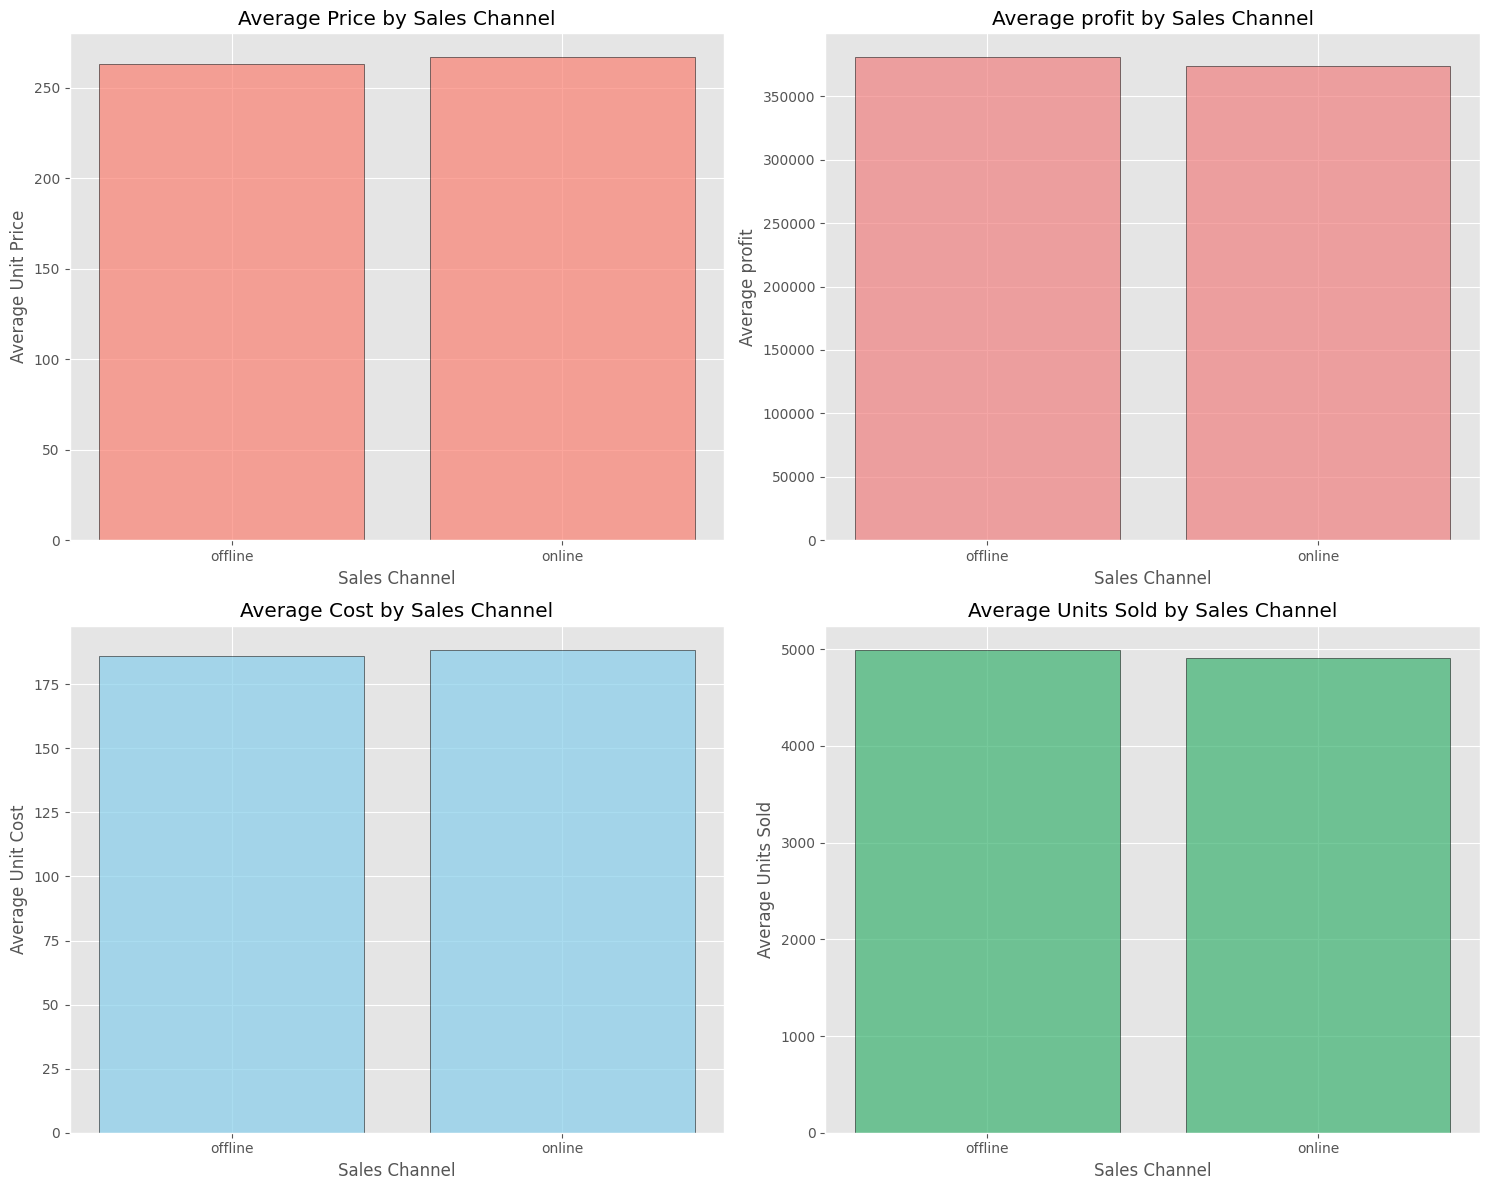

In [ ]:
plt.style.use("ggplot")


fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].bar(channel_price['sales channel'], channel_price['unit price'], color="salmon", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Average Price by Sales Channel")
axes[0, 0].set_xlabel("Sales Channel")
axes[0, 0].set_ylabel("Average Unit Price")

axes[0, 1].bar(channel_profit['sales channel'], channel_profit['profit'], color="lightcoral", alpha=0.7, edgecolor="black")
axes[0, 1].set_title("Average profit by Sales Channel")
axes[0, 1].set_xlabel("Sales Channel")
axes[0, 1].set_ylabel("Average profit")

axes[1, 0].bar(channel_cost['sales channel'], channel_cost['unit cost'], color="skyblue", alpha=0.7, edgecolor="black")
axes[1, 0].set_title("Average Cost by Sales Channel")
axes[1, 0].set_xlabel("Sales Channel")
axes[1, 0].set_ylabel("Average Unit Cost")

axes[1, 1].bar(channel_sold['sales channel'], channel_sold['units sold'], color="mediumseagreen", alpha=0.7, edgecolor="black")
axes[1, 1].set_title("Average Units Sold by Sales Channel")
axes[1, 1].set_xlabel("Sales Channel")
axes[1, 1].set_ylabel("Average Units Sold")

plt.tight_layout()

plt.show()

## <u>4.**Visualization by Date & Country**</u>
The analysis by country provides insights into geographical performance:

  Bar charts show the top 10 countries by average unit price, average profit, average unit cost, and average units sold.  
        Insight: These visualizations identify countries with higher average prices, profits, costs, and sales volumes, indicating potential markets for growth or areas needing strategic adjustments.  
  A choropleth map visualizes the total units sold by country.
        Insight: The choropleth map provides a geographical representation of sales volume, highlighting regions with the highest sales activity.   This can be useful for understanding market penetration and identifying key markets.


In [ ]:
df_total['delivery_day'] = df_total['ship date'] - df_total['order date']
df_total['delivery_day'] = df_total['delivery_day'].dt.days

In [ ]:
df_total["order month"] = df_total["order date"].dt.month
df_total["ship month"] = df_total["ship date"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else: # 9, 10, 11
        return 'Autumn'


df_total['Season'] = df_total['order month'].apply(get_season)

average_delivery_by_season = df_total.groupby('Season')['delivery_day'].mean()


season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
average_delivery_by_season = average_delivery_by_season.reindex(season_order)

In [ ]:
delivery_by_item = df_total.groupby("item_type")["delivery_day"].mean().sort_values(ascending=False)
delivery_by_country = df_total.groupby("country")["delivery_day"].mean().sort_values(ascending=False)
delivery_by_region = df_total.groupby("sub-region")["delivery_day"].mean().sort_values(ascending=False)
delivery_by_season = df_total.groupby("Season")["delivery_day"].mean().sort_values(ascending=False)
#delivery_by_item
#delivery_by_country
#delivery_by_region
#delivery_by_season


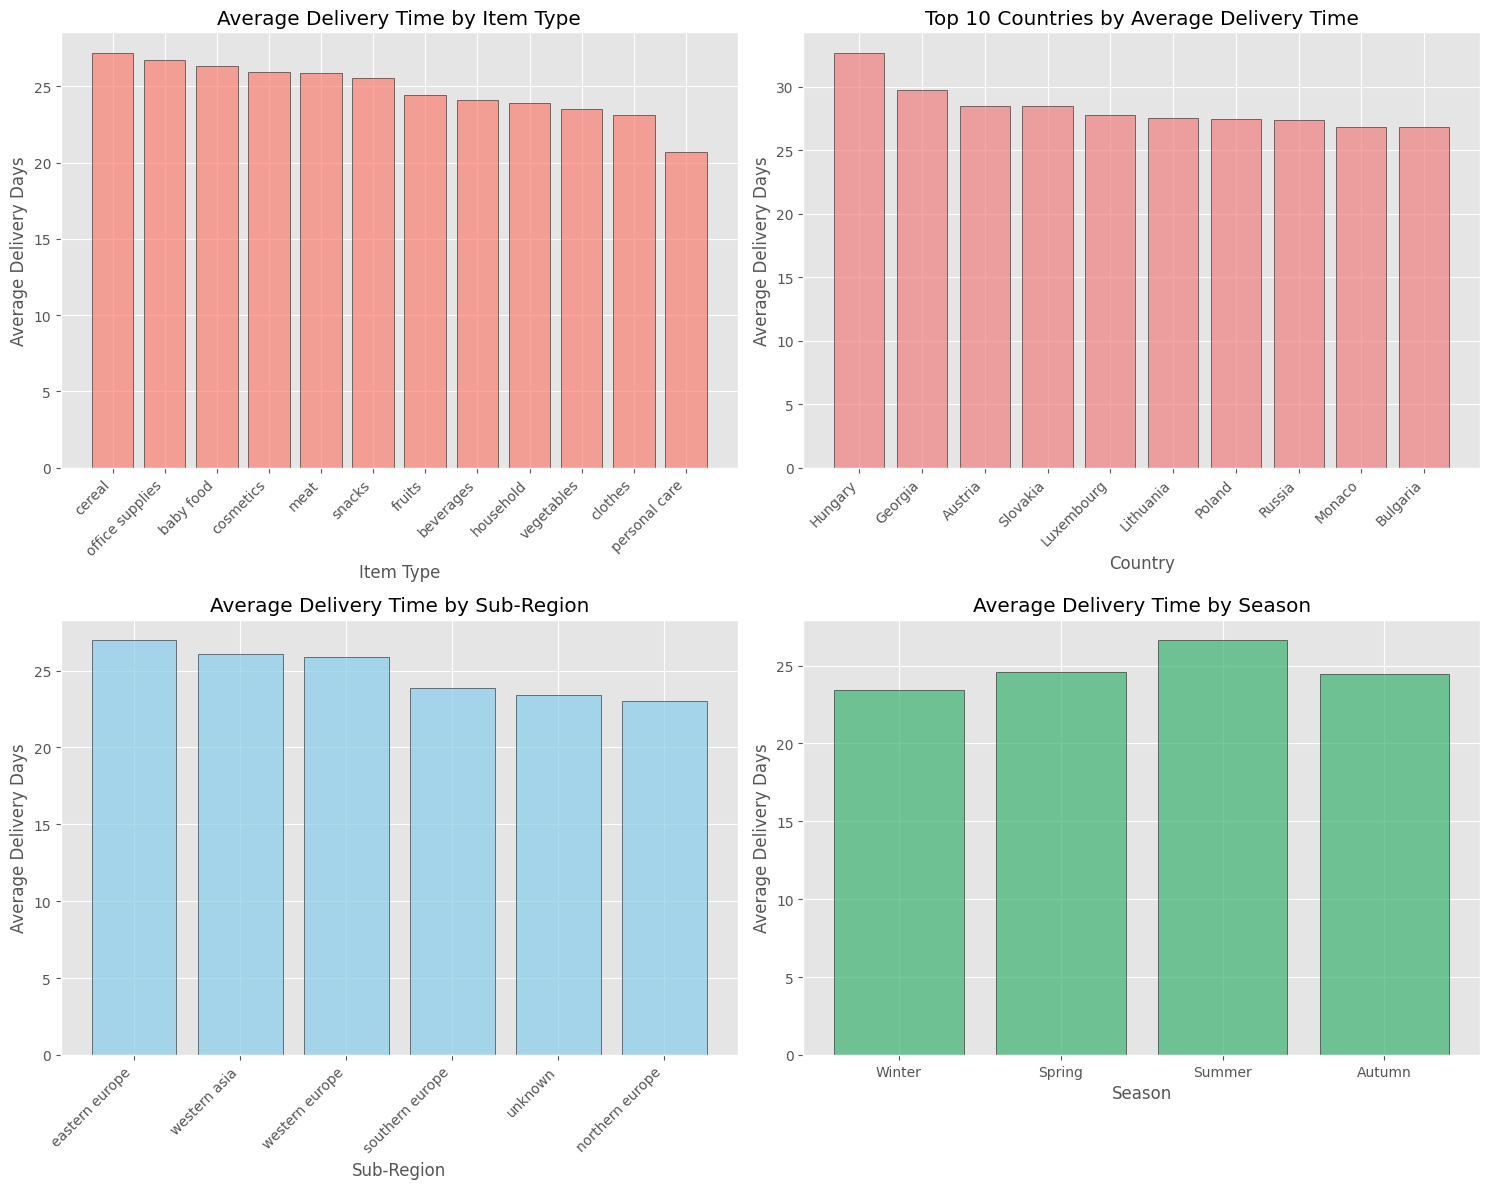

In [ ]:


plt.style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

plot_data_item = delivery_by_item
axes[0, 0].bar(plot_data_item.index, plot_data_item.values, color="salmon", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Average Delivery Time by Item Type")
axes[0, 0].set_xlabel("Item Type")
axes[0, 0].set_ylabel("Average Delivery Days")
axes[0, 0].tick_params(axis='x', rotation=45)
current_ticks_00 = axes[0, 0].get_xticks()
axes[0, 0].set_xticks(current_ticks_00)
axes[0, 0].set_xticklabels(plot_data_item.index, ha='right')

plot_data_country = delivery_by_country.head(10)
axes[0, 1].bar(plot_data_country.index.str.capitalize(), plot_data_country.values, color="lightcoral", alpha=0.7, edgecolor="black")
axes[0, 1].set_title("Top 10 Countries by Average Delivery Time")
axes[0, 1].set_xlabel("Country")
axes[0, 1].set_ylabel("Average Delivery Days")
axes[0, 1].tick_params(axis='x', rotation=45)
current_ticks_01 = axes[0, 1].get_xticks()
axes[0, 1].set_xticks(current_ticks_01)
axes[0, 1].set_xticklabels(plot_data_country.index.str.capitalize(), ha='right')

plot_data_region = delivery_by_region
axes[1, 0].bar(plot_data_region.index, plot_data_region.values, color="skyblue", alpha=0.7, edgecolor="black")
axes[1, 0].set_title("Average Delivery Time by Sub-Region")
axes[1, 0].set_xlabel("Sub-Region")
axes[1, 0].set_ylabel("Average Delivery Days")
axes[1, 0].tick_params(axis='x', rotation=45)
current_ticks_10 = axes[1, 0].get_xticks()
axes[1, 0].set_xticks(current_ticks_10)
axes[1, 0].set_xticklabels(plot_data_region.index, ha='right')

season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
plot_data_season = delivery_by_season.reindex(season_order) if all(s in delivery_by_season.index for s in season_order) else delivery_by_season.sort_index()

axes[1, 1].bar(plot_data_season.index, plot_data_season.values, color="mediumseagreen", alpha=0.7, edgecolor="black")
axes[1, 1].set_title("Average Delivery Time by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Average Delivery Days")

plt.tight_layout()

plt.show()

In [ ]:
country_sales = df_total.groupby('country')['delivery_day'].mean().reset_index()


fig = px.choropleth(
    country_sales,
    locations="country",
    locationmode="country names",
    color="delivery_day",
    color_continuous_scale="Viridis",
    title="Total Units Sold by Country"
)


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        #projection_type='orthographic'
    ),
    width=1000,
    height=500,
     margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

<Figure size 1500x700 with 0 Axes>

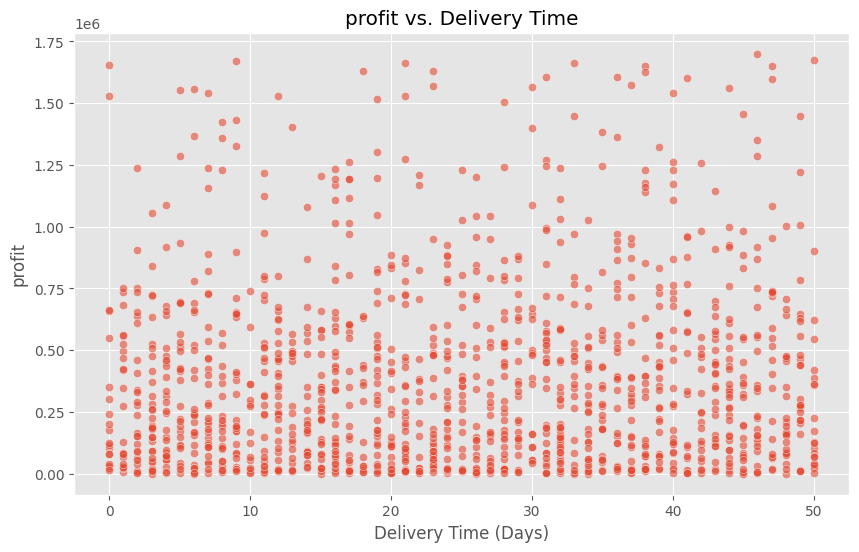

In [ ]:
correlation = df_total['profit'].corr(df_total['delivery_day'])


plt.figure(figsize=(15, 7))
plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_total['delivery_day'], y=df_total['profit'], alpha=0.6)
plt.title("profit vs. Delivery Time")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("profit")
plt.grid(True)
plt.show()

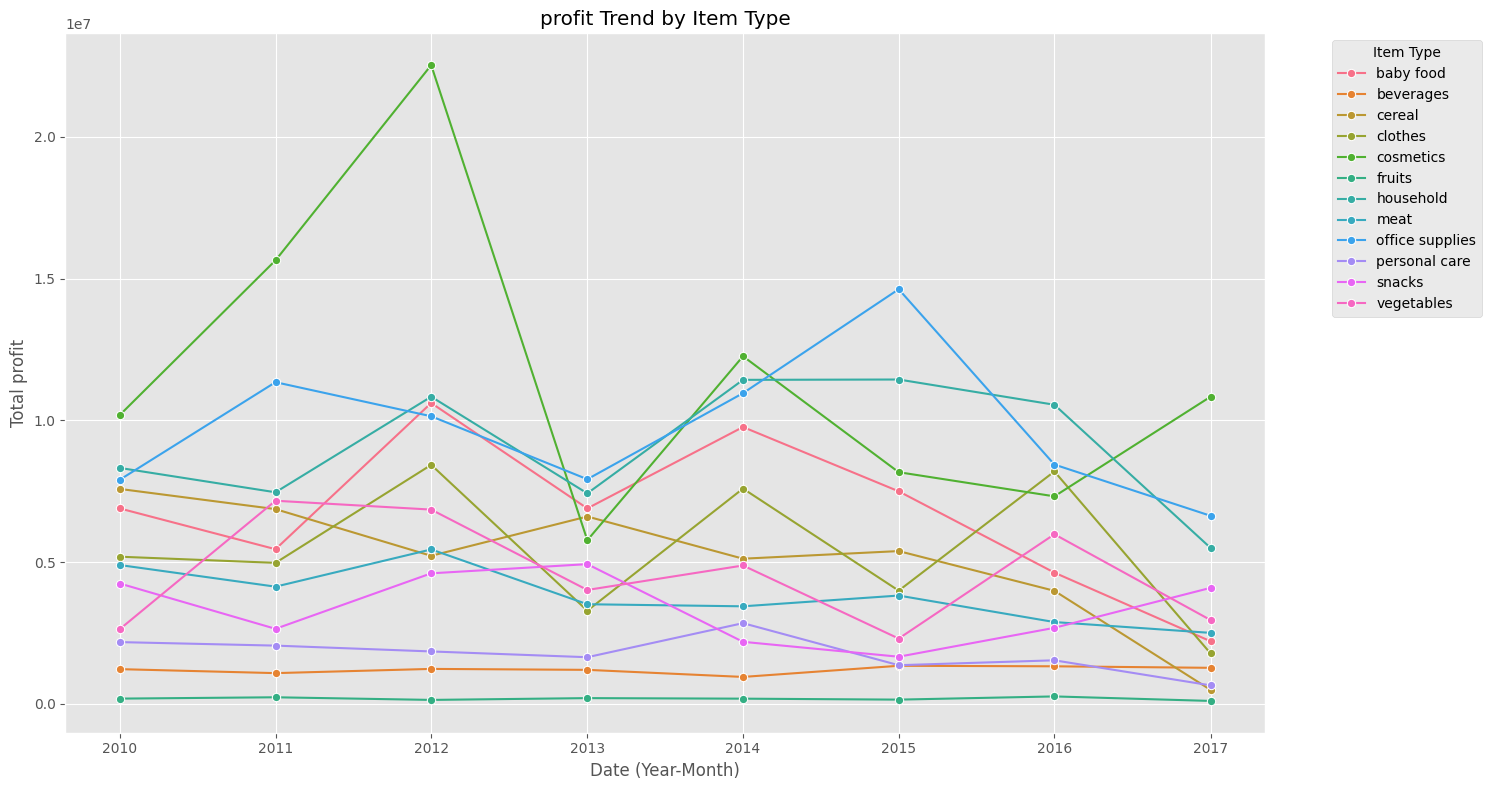

In [ ]:
df_total['order date'] = pd.to_datetime(df_total['order date'])

df_total['order_year'] = df_total['order date'].dt.year
df_total['order_month'] = df_total['order date'].dt.month
df_total['year_month'] = df_total['order date'].dt.to_period('Y')

profit_time_item = df_total.groupby(['year_month', 'item_type'])['profit'].sum().reset_index()

profit_time_item['year_month'] = profit_time_item['year_month'].dt.to_timestamp()

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=profit_time_item,
    x='year_month',
    y='profit',
    hue='item_type',
    marker='o'
)

plt.title('profit Trend by Item Type')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total profit')
plt.grid(True)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

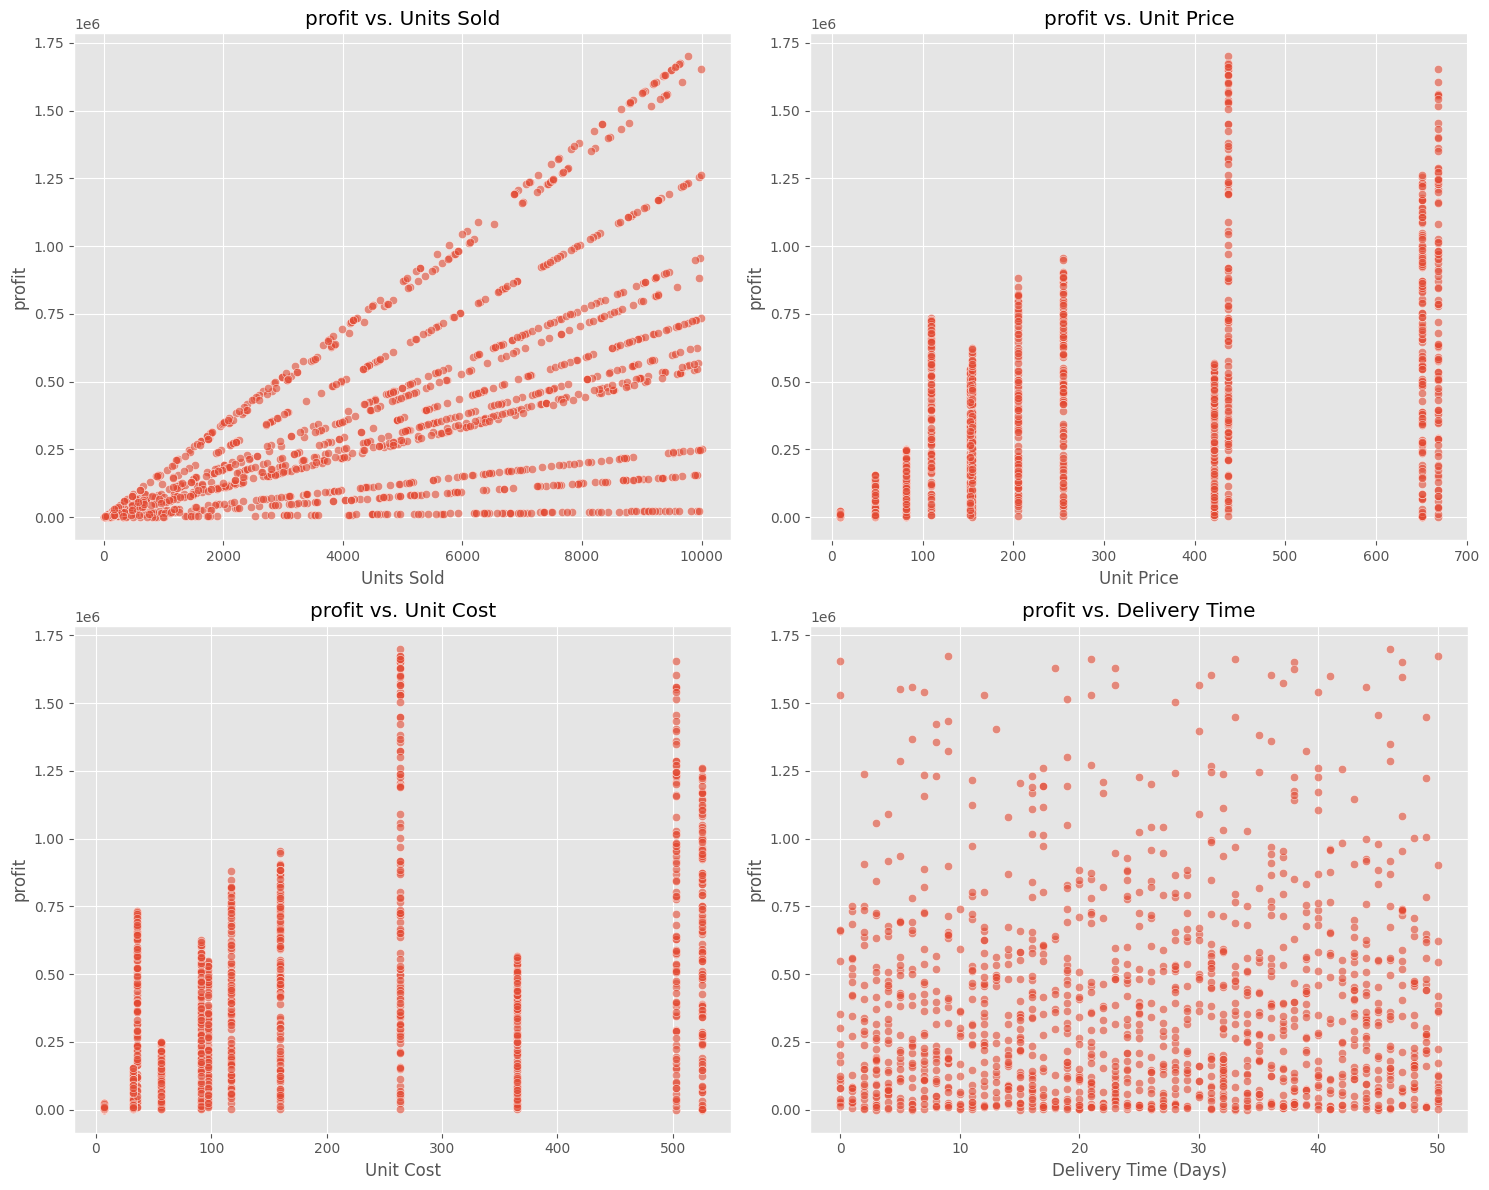

In [ ]:
plt.style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.scatterplot(x='units sold', y='profit', data=df_total, ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title("profit vs. Units Sold")
axes[0, 0].set_xlabel("Units Sold")
axes[0, 0].set_ylabel("profit")

sns.scatterplot(x='unit price', y='profit', data=df_total, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("profit vs. Unit Price")
axes[0, 1].set_xlabel("Unit Price")
axes[0, 1].set_ylabel("profit")

sns.scatterplot(x='unit cost', y='profit', data=df_total, ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title("profit vs. Unit Cost")
axes[1, 0].set_xlabel("Unit Cost")
axes[1, 0].set_ylabel("profit")

sns.scatterplot(x='delivery_day', y='profit', data=df_total, ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("profit vs. Delivery Time")
axes[1, 1].set_xlabel("Delivery Time (Days)")
axes[1, 1].set_ylabel("profit")

plt.tight_layout()
plt.show()

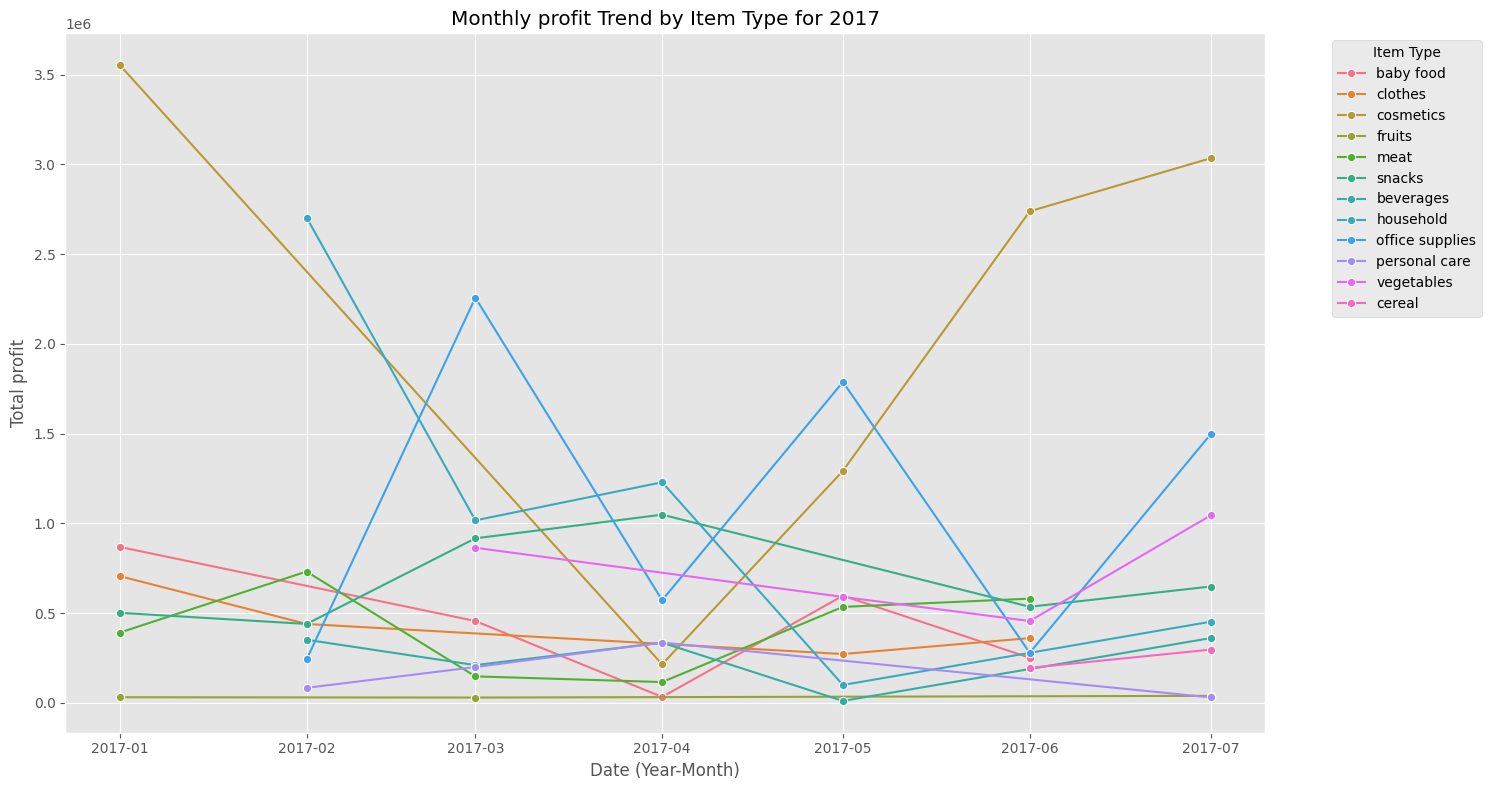

In [ ]:
# @title
df_total['order date'] = pd.to_datetime(df_total['order date'])

df_total['order_year'] = df_total['order date'].dt.year
df_total['order_month'] = df_total['order date'].dt.month
df_total['year_month'] = df_total['order date'].dt.to_period('M')

df_filtered_year = df_total[df_total['order_year'] == 2017]

profit_time_item_filtered = df_filtered_year.groupby(['year_month', 'item_type'])['profit'].sum().reset_index()

profit_time_item_filtered['year_month'] = profit_time_item_filtered['year_month'].dt.to_timestamp()

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=profit_time_item_filtered,
    x='year_month',
    y='profit',
    hue='item_type',
    marker='o'
)

plt.title('Monthly profit Trend by Item Type for 2017')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total profit')
plt.grid(True)
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df_total['order date'] = pd.to_datetime(df_total['order date'])

df_total['Day of Week'] = df_total['order date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

profit_by_day_item = df_total.groupby(['Day of Week', 'item_type'])['profit'].sum().reset_index()

profit_by_day_item['Day of Week'] = pd.Categorical(profit_by_day_item['Day of Week'], categories=day_order, ordered=True)
profit_by_day_item = profit_by_day_item.sort_values(['Day of Week', 'item_type'])

#print(profit_by_day_item.head())

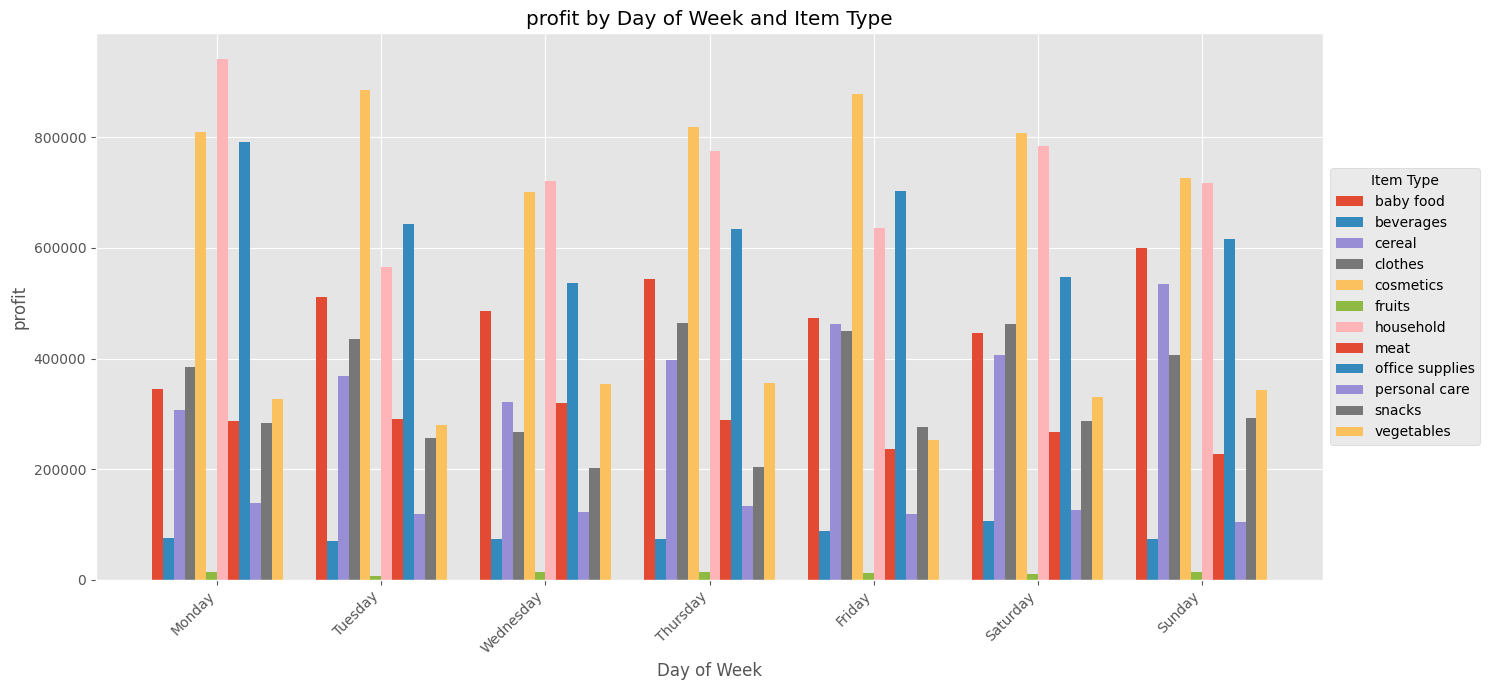

In [ ]:
df_total['order date'] = pd.to_datetime(df_total['order date'])

df_total['Day of Week'] = df_total['order date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

profit_by_day_item = df_total.groupby(['Day of Week', 'item_type'])['profit'].mean().reset_index()

profit_by_day_item['Day of Week'] = pd.Categorical(profit_by_day_item['Day of Week'], categories=day_order, ordered=True)
profit_by_day_item = profit_by_day_item.sort_values(['Day of Week', 'item_type'])

plt.figure(figsize=(15, 7))
plt.style.use("ggplot")

days_of_week = profit_by_day_item['Day of Week'].cat.categories
item_types = profit_by_day_item['item_type'].unique()

x = np.arange(len(days_of_week))
width = 0.8 / len(item_types)

for i, item_type in enumerate(item_types):
    item_data = profit_by_day_item[profit_by_day_item['item_type'] == item_type]
    profit_values = [item_data[item_data['Day of Week'] == day]['profit'].sum() for day in days_of_week]
    plt.bar(x + i * width, profit_values, width, label=item_type)

plt.title("profit by Day of Week and Item Type")
plt.xlabel("Day of Week")
plt.ylabel("profit")
plt.xticks(x + (len(item_types) - 1) * width / 2, days_of_week, rotation=45, ha='right')
plt.legend(title="Item Type", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

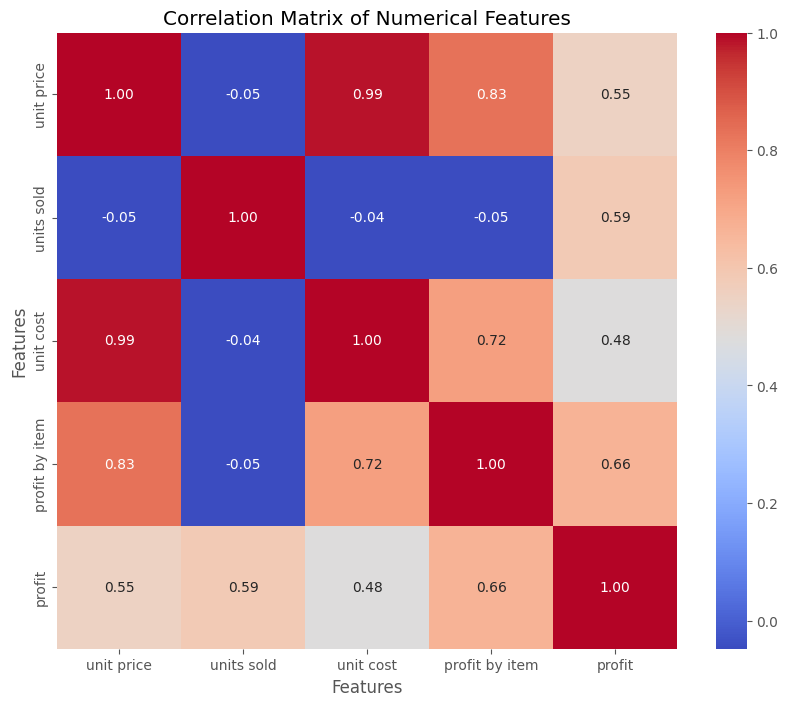

In [ ]:
numerical_features = ['unit price', 'units sold','unit cost', 'profit by item', 'profit']
correlation_matrix = df_total[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

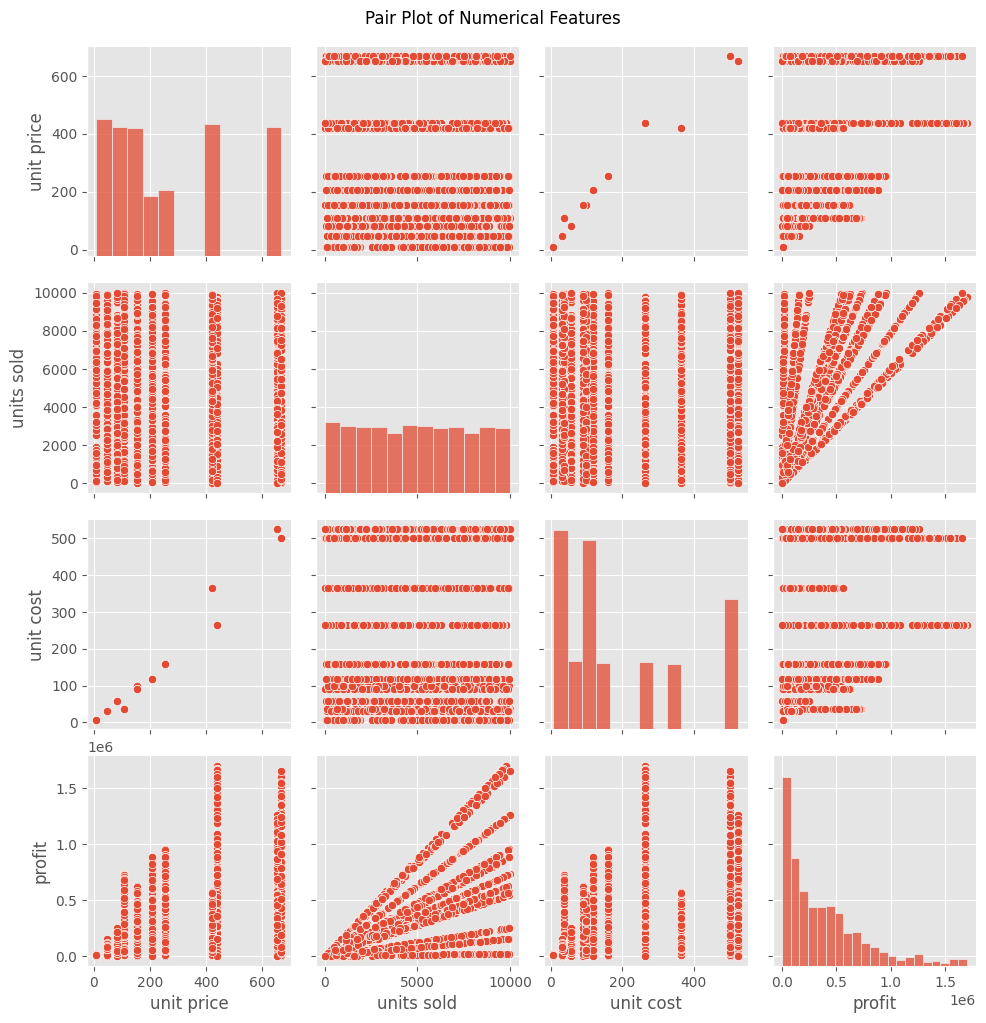

In [ ]:
numerical_features = ['unit price', 'units sold','unit cost', 'profit']

sns.pairplot(df_total[numerical_features])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

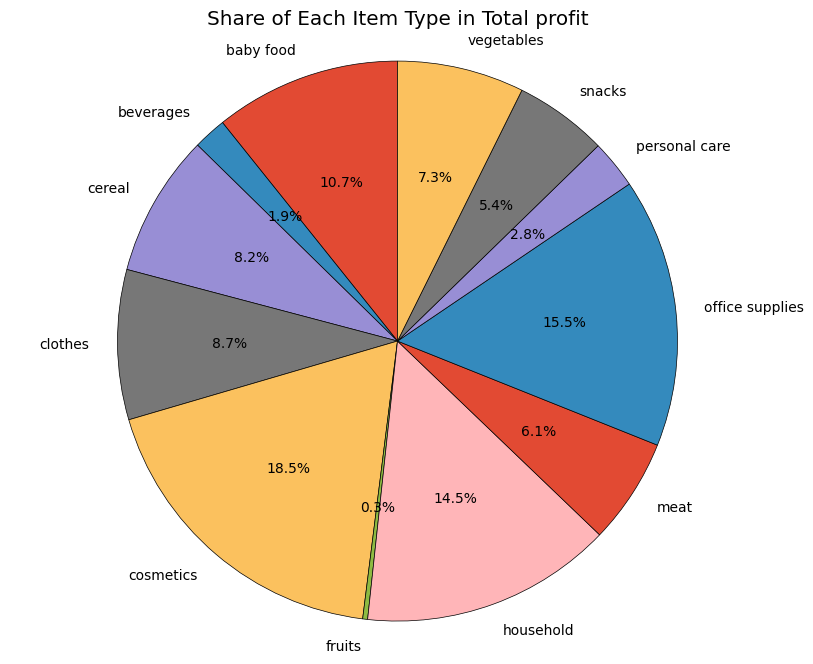

In [ ]:
profit_by_item_type = df_total.groupby('item_type')['profit'].sum()

plt.figure(figsize=(10, 8))
plt.pie(profit_by_item_type, labels=profit_by_item_type.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Share of Each Item Type in Total profit")
plt.axis('equal')
plt.show()

# **Overall Insights and Recommendations**

Based on the analysis and visualizations, several key insights have been gained:

- There is significant variation in sales performance across different item types, countries, and sales channels.
- Understanding the most profitable item types and the countries/channels where they perform best is crucial for optimizing sales strategies.
- Delivery time varies across item types, countries, and regions, which could impact customer satisfaction and potentially profit.
- Time-based analysis reveals trends and seasonality in profit, providing insights for forecasting and planning.
- The correlation analysis helps to understand the relationships between key numerical metrics, such as the impact of unit price or units sold on profit.
---
# **Recommendations:**

- Investigate the factors contributing to high profit for specific item types and explore strategies to replicate this success across other items.
- Focus marketing and sales efforts on the countries and sales channels that demonstrate higher average profits and units sold.
- Analyze the reasons for longer delivery times in certain regions or for specific item types and explore ways to improve logistics efficiency.
- Utilize the time-based trends to inform sales forecasting, inventory management, and marketing campaigns.
- Deep dive into the relationships identified in the correlation matrix to understand the drivers of profit and optimize pricing and cost strategies.

